# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer, LabelEncoder, MinMaxScaler

In [46]:
data = pd.read_csv('cleaned_zomato.csv')

In [47]:
data.head()

,Unnamed: 0,type,city,latitude,longitude,price_range,rating,votes,photo_count,delivery,area,chain_restaurant,indian,asian,western,middle_eastern,fast_food,others,highlights_count
0,0,Quick Bites,Agra,27.211450,78.002381,2,4.4,814,154,0,240928,1,1,0,0,0,1,1,8
1,1,Quick Bites,Agra,27.160569,78.011583,2,4.4,1203,161,0,240928,0,1,1,0,0,1,0,7
2,2,Quick Bites,Agra,27.182938,77.979684,1,4.2,801,107,1,240928,1,0,0,0,0,1,0,14
3,3,Quick Bites,Agra,27.205668,78.004799,1,4.3,693,157,1,240928,1,1,0,0,0,1,1,11
4,4,Casual Dining,Agra,27.157709,78.052421,3,4.9,470,291,1,240928,0,1,0,1,0,0,0,27


In [48]:
data = data.drop('Unnamed: 0', axis=1)

#### Transforming continius data


In [49]:
def split_numericals(data, threshold=10):
    num = data.select_dtypes(np.number)
    cont_columns = [col for col in num.columns \
        if len(num[col].unique()) > threshold]
    disc_columns = [col for col in num.columns \
        if len(num[col].unique()) <= threshold]
    num_cont = data.loc[:, cont_columns]
    num_disc = data.loc[:, disc_columns]
    return num_cont, num_disc

num_cont, num_disc = split_numericals(data)

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


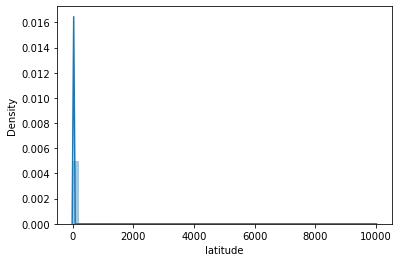

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


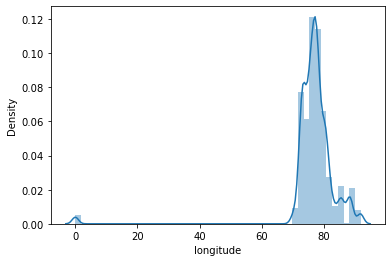

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


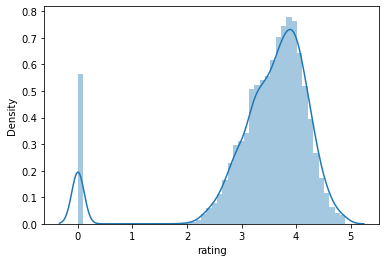

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


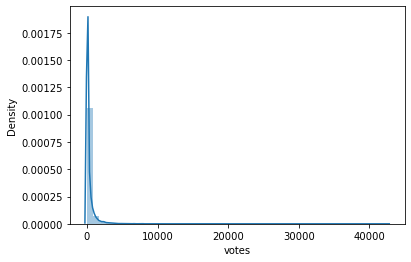

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


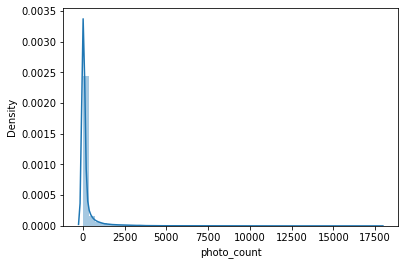

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


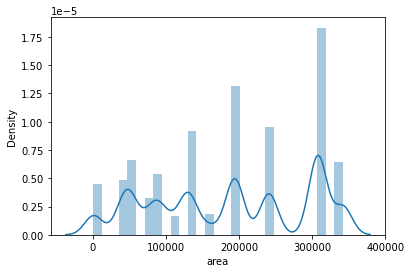

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


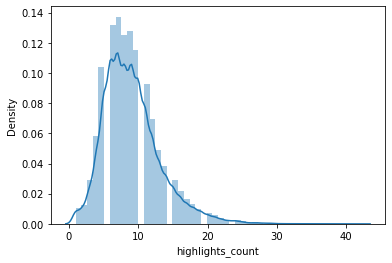

In [50]:
for col in num_cont:
    sns.distplot(data[col])
    plt.show()

For latitude and longitude columns, it's better to keep them as they are, as they represent geographic coordinates and should not be transformed.

In [51]:
data['area'].dtype

dtype('int64')

In [52]:
data['area'] = data['area'].astype('object')

In [53]:
#define function
def log_transform(x):
    if x<=0:
        return 0
    else:
        return np.log(x)

In [54]:
def sq_rt_transform(x):
    if x<0:
        return 0
    else:
        return x**0.5

In [55]:
def cube_rt_transform(x):
    if x<0:
        return 0
    else:
        return x**0.333

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

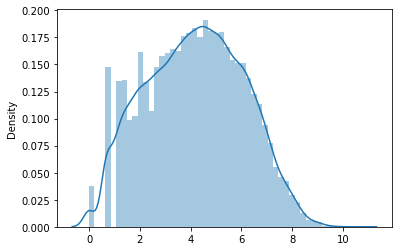

In [56]:
temp = list(map(log_transform, data['votes']))
sns.distplot(temp)

After applying different transformation, i decided to go with log transformation for votes column.

In [57]:
data['votes'] = list(map(log_transform, data['votes']))

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

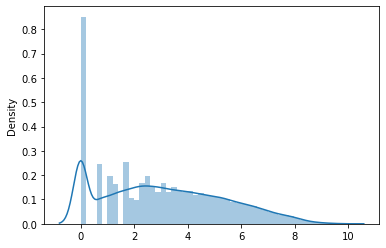

In [58]:
temp = list(map(log_transform, data['photo_count']))
sns.distplot(temp)

In [59]:
data['photo_count'] = list(map(log_transform, data['photo_count']))

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

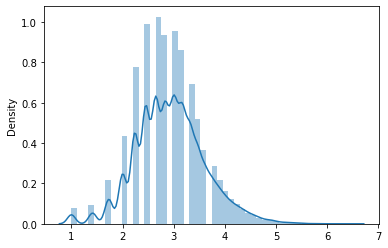

In [60]:
temp = list(map(sq_rt_transform, data['highlights_count']))
sns.distplot(temp)

In [61]:
data['highlights_count'] = list(map(sq_rt_transform, data['highlights_count']))

#### Removing outliers

In [62]:
def column_plotter(cat_or_num_disc, plot_type=sns.countplot):
    col_number = len(cat_or_num_disc.columns)
    for i in range(0, col_number, 2):
        column_1 = cat_or_num_disc.columns[i]
        try:
            column_2 = cat_or_num_disc.columns[i + 1]
            fig, ax = plt.subplots(1, 2, figsize=(12, 4))        
            plot_type(x=column_2, data=cat_or_num_disc, ax=ax[1], color='b')
            plot_type(x=column_1, data=cat_or_num_disc, ax=ax[0], color='c')        
        except:
            fig, ax = plt.subplots(1, 1, figsize=(6, 4))  
            plot_type(x=column_1, data=cat_or_num_disc, color='c')              
        plt.show()

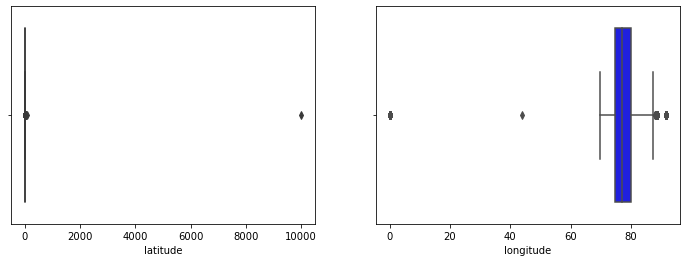

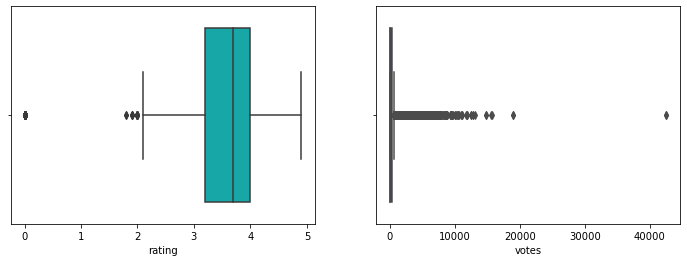

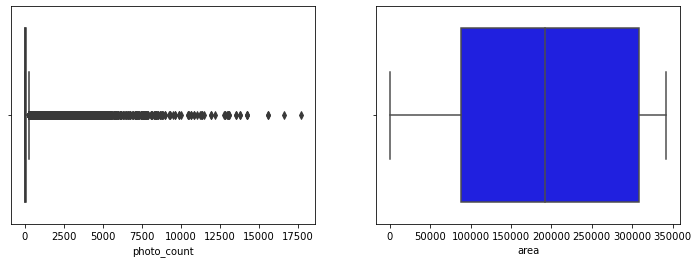

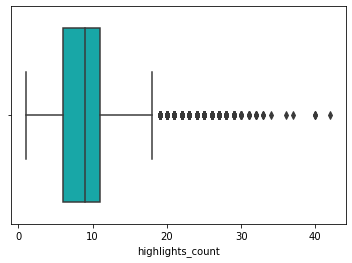

In [63]:
column_plotter(num_cont, plot_type=sns.boxplot)

In [64]:
def remove_outliers(df, threshold):
    numerical = df.select_dtypes(np.number)
    columns = numerical.columns
    for column in columns:
        if len(df[column].unique()) < 100:
            continue
        else:
            upper = np.percentile(df[column], 75)
            lower = np.percentile(df[column], 25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [65]:
data.shape

(47273, 18)

In [66]:
data = remove_outliers(data, 1.5)

In [67]:
data.shape

(44259, 18)

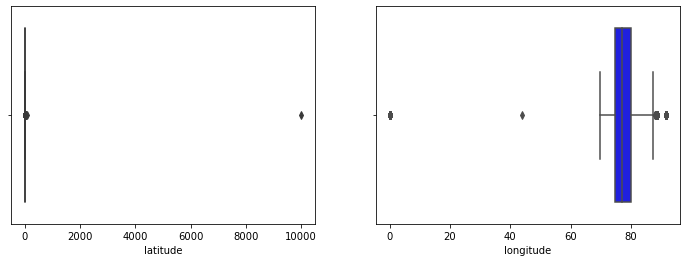

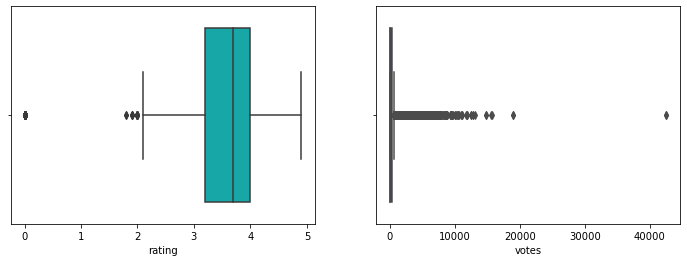

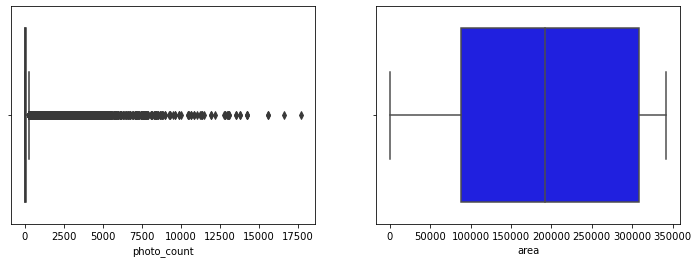

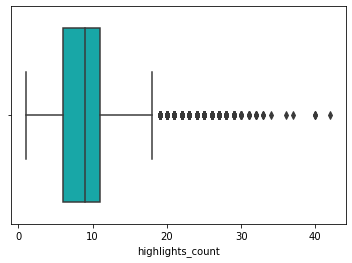

In [69]:
column_plotter(num_cont, plot_type=sns.boxplot)

In [70]:
data.shape

(44259, 18)

### Encoding and Scaling

In [71]:
def preprocess_data(df, target):
    # Encode categorical variables
    cat = df.select_dtypes(object)
    encoder = OneHotEncoder(drop='first').fit(cat)
    cat_encoded = pd.DataFrame(encoder.transform(cat).toarray(),
                               columns=encoder.get_feature_names(cat.columns),
                               index=cat.index)

    # Scale numerical variables
    num = df.drop(target, axis=1).select_dtypes(np.number)
    scaler = MinMaxScaler().fit(num) 
    num_scaled = pd.DataFrame(scaler.transform(num),
                              columns=num.columns,
                              index=num.index)

    # Combine encoded categorical and scaled numerical variables
    processed_df = pd.concat([cat_encoded, num_scaled, df[target]], axis=1)

    return processed_df


In [72]:
data = preprocess_data(data, 'rating')

C:\Users\ivanr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [73]:
data.to_csv('processed_zomato.csv')